### **Step 1: Importing Data and Understanding the Dataset**

In [1]:
pip install contractions

     |████████████████████████████████| 284 kB 7.4 MB/s 
     |████████████████████████████████| 321 kB 29.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85448 sha256=a1faf31ccf955b8bc01c888e8c1dc68e1332dfd999a42be9db864eb0c7898b1a
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import contractions
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
true_news = pd.read_csv('/content/drive/My Drive/CS410Project/data/True.csv')
fake_news = pd.read_csv('/content/drive/My Drive/CS410Project/data/Fake.csv')


In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true_news.shape

(21417, 4)

In [9]:
fake_news.shape

(23481, 4)

In [10]:
true_news['isReal'] = 1
fake_news['isReal'] = 0

In [11]:
news = pd.concat([true_news, fake_news], ignore_index=True)
news.head()

,title,text,subject,date,isReal
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [12]:
news.shape

(44898, 5)

In [13]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   isReal   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


**Check for duplicates**

In [14]:
duplicates = news[news.duplicated()]
duplicates

,title,text,subject,date,isReal
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",1
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",1
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017",1
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",1
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017",1
...,...,...,...,...,...
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
31359,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0
32863,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",0


There are 209 duplicate records and we will remove them from the concatenated dataset.

In [15]:
news.drop_duplicates(inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   isReal   44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


Check for null values

In [16]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
isReal     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


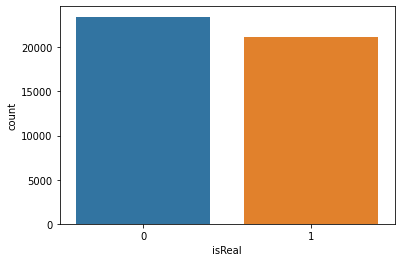

In [17]:
sns.countplot(news['isReal'])

The distribution of the label is pretty balance according to the plot.

### **Step 2: Data Cleaning**

In [18]:
#Expanding contractions

news['title'] = news['title'].apply(lambda x:contractions.fix(x))
news['text'] = news['text'].apply(lambda x:contractions.fix(x))

In [19]:
#Changing all text to lowercase

news['title'] = news['title'].apply(lambda x:x.lower())
news['text'] = news['text'].apply(lambda x:x.lower())

In [20]:
#Removing whitespace

news['title'] = news['title'].apply(lambda x: re.sub(' +',' ',x))
news['text'] = news['text'].apply(lambda x: re.sub(' +',' ',x))

In [21]:
#Removing punctuation marks

news['title'] = news['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
news['text'] = news['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [22]:
#Removing numbers

news['title'] = news['title'].apply(lambda x: re.sub('\w*\d\w*','', x))
news['text'] = news['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [23]:
news.head()

,title,text,subject,date,isReal
0,as yous budget fight looms republicans flip th...,washington reuters the head of a conservative...,politicsNews,"December 31, 2017",1
1,yous military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",1
2,senior yous republican senator let mr mueller ...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",1
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1


In [24]:
#removing stop words
import nltk
nltk.download('stopwords')

# lemmatizer = nltk.stem.WordNetLemmatizer()
# tokenizer = nltk.tokenize.WhitespaceTokenizer()
stops = set(stopwords.words('english'))

def remove_stopwords(text):
  #tokens_without_stopwords = [word for word in word_tokenize(text) if not word in stops]
  #no_stopwords = (" ").join(tokens_without_stopwords)
  #no_stopwords = " ".join([word for word in text if not word in stops])
  no_stopwords = " ".join([word for word in text.split() if not word in stops])
  return no_stopwords

news['title'] = news.title.apply(remove_stopwords)
news['text'] = news.text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
news.head()

,title,text,subject,date,isReal
0,yous budget fight looms republicans flip fisca...,washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,yous military accept transgender recruits mond...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,senior yous republican senator let mr mueller job,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,trump wants postal service charge much amazon ...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


In [26]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
isReal     0
dtype: int64

### **Step 3: Generating Word Clouds**

Word Cloud for Real News

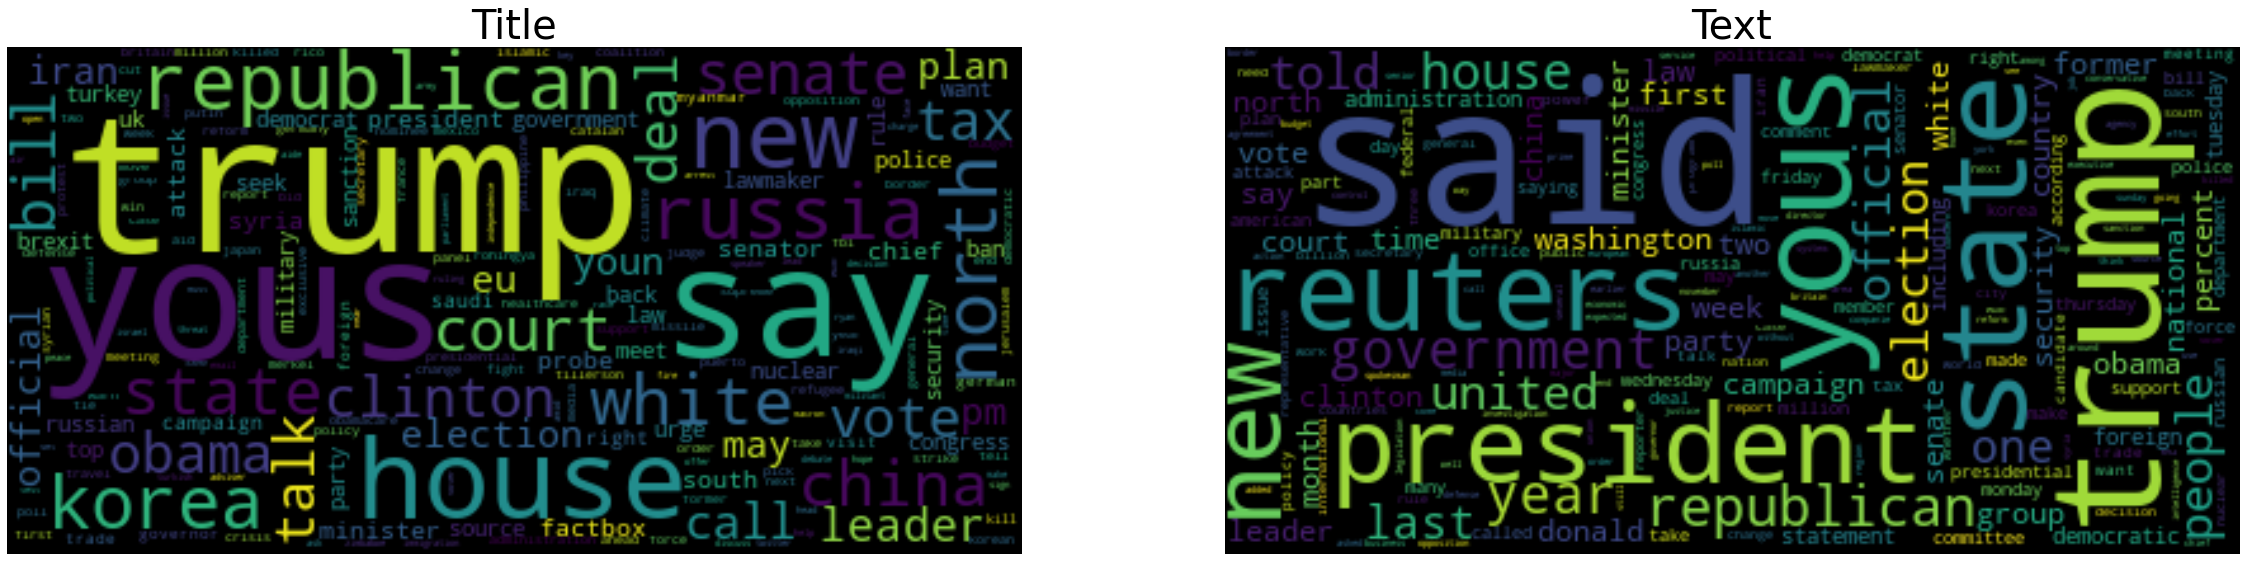

In [27]:
news_true = news[news.isReal == 1]

title_true = ' '.join(news_true.title)
text_true = ' '.join(news_true.text)

plt.figure(figsize=(40,30))

title_cloud = WordCloud(collocations=False, background_color='black').generate(title_true)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')

Word Cloud for Fake News

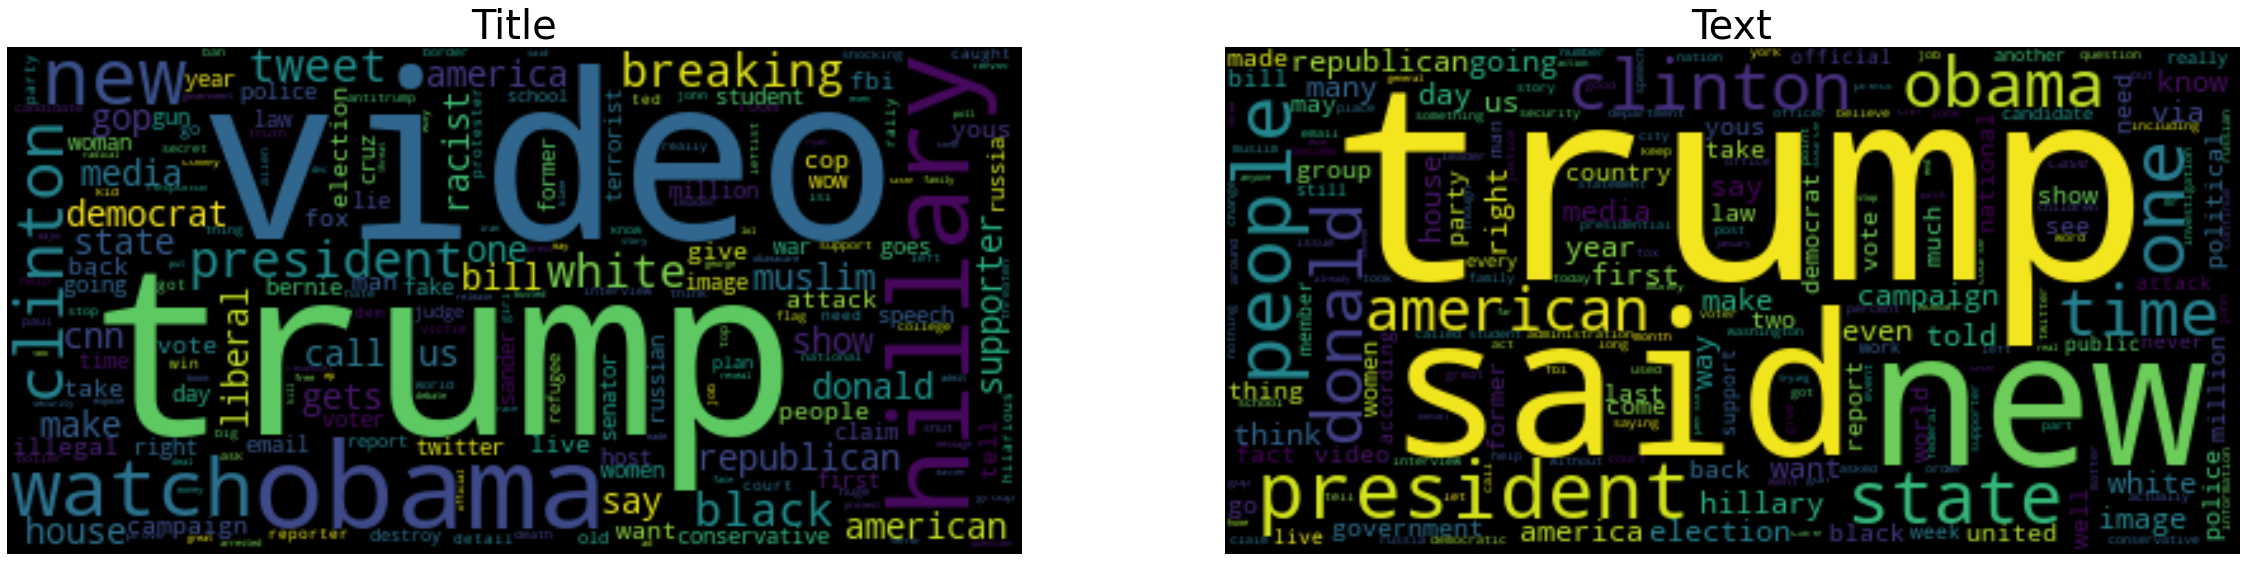

In [28]:
news_fake = news[news.isReal == 0]

title_fake = ' '.join(news_fake.title)
text_fake = ' '.join(news_fake.text)

plt.figure(figsize=(40,30))

title_cloud = WordCloud(collocations=False, background_color='black').generate(title_fake)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_fake)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


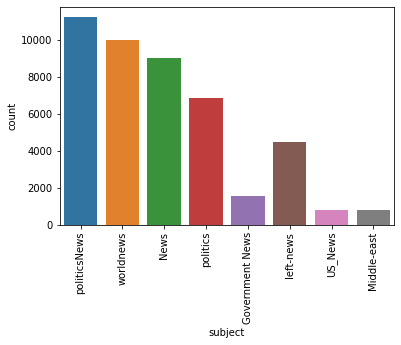

In [29]:
sns.countplot(news['subject'])
plt.xticks(rotation=90)
plt.show()

Subject Analysis: According to the plot above, the main subject of this news dataset is politics related.

### Step 4: Top N-gram Analysis

In [30]:
from collections import Counter

def print_top_bottom_words(token_list, n):
    words_counter = Counter(token_list)
    print(f'Top {n} words in news:')
    print(words_counter.most_common()[:n])
    print()

    print(f'Bottom {n} words in news:')
    print(words_counter.most_common()[-n:])
    print()

In [31]:
nltk.download('punkt')

word_tokens = nltk.word_tokenize(''.join(news_fake.text))
print_top_bottom_words(word_tokens, 25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Top 25 words in news:
[('trump', 72998), ('said', 30933), ('people', 25820), ('president', 25128), ('would', 23586), ('one', 22534), ('clinton', 17898), ('obama', 17543), ('like', 17524), ('donald', 15763), ('also', 15216), ('new', 14002), ('us', 13932), ('even', 13607), ('hillary', 13207), ('news', 12983), ('white', 12687), ('time', 12611), ('state', 12444), ('via', 11117), ('media', 10898), ('get', 10661), ('campaign', 10527), ('going', 10520), ('house', 10454)]

Bottom 25 words in news:
[('removedg', 1), ('laterh', 1), ('centuriesj', 1), ('rangecon', 1), ('frenchglen', 1), ('glerup', 1), ('chargesk', 1), ('publicm', 1), ('altogethern', 1), ('grandsonp', 1), ('homeon', 1), ('ramification', 1), ('homeq', 1), ('courtroomr', 1), ('exemplifying', 1), ('yearst', 1), ('releasedyou', 1), ('blmv', 1), ('resentencing', 1), ('treehousehere', 1), ('betti', 1), ('grandmotherlast', 1), ('eman

In [32]:
from nltk.util import ngrams
def top_k_ngrams(text, n=1, k=1):
    token_list = nltk.word_tokenize(text)
    ngrams_list = list(ngrams(token_list, n))
    gram_counter = Counter(ngrams_list)
    return gram_counter.most_common()[:k]

def top_k_ngrams_subject(subject, n=1, k=20):
    if subject == 'News':
        sub_fake = news_fake
    else:
        sub_fake = news_fake.loc[news_fake['subject'].apply(lambda x: True if subject in x else False)]
    text = ''.join(sub_fake.text)
    common_words = top_k_ngrams(text, n, k)
    df = pd.DataFrame(common_words, columns=['Word','count'])
    df['Word'] = df.Word.apply(lambda x:' '.join(x))
    
    if n==1:
        gram_name = 'Words'
    elif n==2:
        gram_name = 'Bigrams'
    elif n==3:
        gram_name = 'Trigrams'
    elif n==4:
        gram_name = 'Quatgrams'
    else:
        gram_name = f'{n}grams'
    
    print(f'top {gram_name} in {subject} subject')
    print(df)
    df.groupby('Word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title=f'Top {gram_name} in {subject} subject')

top Words in News subject
         Word  count
0       trump  72998
1        said  30933
2      people  25820
3   president  25128
4       would  23586
5         one  22534
6     clinton  17898
7       obama  17543
8        like  17524
9      donald  15763
10       also  15216
11        new  14002
12         us  13932
13       even  13607
14    hillary  13207
15       news  12983
16      white  12687
17       time  12611
18      state  12444
19        via  11117
20      media  10898
21        get  10661
22   campaign  10527
23      going  10520
24      house  10454
25    america  10430
26      could  10179
27       know  10127
28   american   9882
29      first   9881


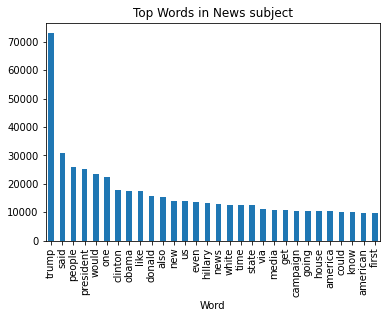

In [33]:
top_k_ngrams_subject('News', n=1, k=30)


top Words in politics subject
         Word  count
0       trump  12211
1        said   9024
2   president   6933
3     clinton   5944
4      people   5548
5       would   5247
6         one   5064
7       obama   5022
8     hillary   4428
9        like   3580
10        new   3477
11      state   3315
12       also   3314
13       news   2986
14      white   2953
15      house   2790
16       time   2779
17      first   2734
18    america   2731
19     donald   2685
20       told   2678
21   american   2673
22         us   2589
23       yous   2450
24     police   2449
25   campaign   2410
26       know   2367
27      media   2358
28        get   2320
29       even   2304


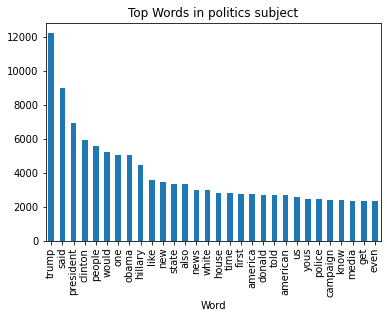

In [34]:
top_k_ngrams_subject('politics', 1, k=30)

top Words in Government News subject
          Word  count
0         said   2393
1        obama   1810
2    president   1445
3        would   1427
4       people   1339
5        state   1220
6          one   1200
7   government   1078
8      clinton   1050
9         yous   1040
10       trump   1021
11        also    932
12         new    903
13       house    816
14      states    805
15  department    783
16    american    782
17          us    744
18     federal    728
19      united    724
20        like    713
21     america    691
22        time    672
23       could    669
24       first    661
25         two    656
26         law    647
27       years    641
28    security    623
29        told    622


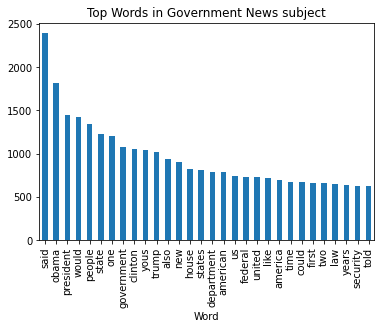

In [35]:
top_k_ngrams_subject('Government News', 1, k=30)

top Words in left-news subject
         Word  count
0       trump   7172
1        said   6568
2   president   4369
3      people   4141
4         one   3754
5       would   3608
6       obama   3264
7     clinton   3215
8     hillary   2836
9      police   2687
10       like   2610
11       also   2462
12        new   2452
13      white   2285
14       news   2171
15      black   2143
16       told   2118
17      state   2106
18       time   1987
19    america   1899
20      first   1896
21      media   1829
22         us   1813
23   american   1756
24      house   1692
25       even   1660
26        get   1652
27     donald   1633
28      going   1633
29        two   1632


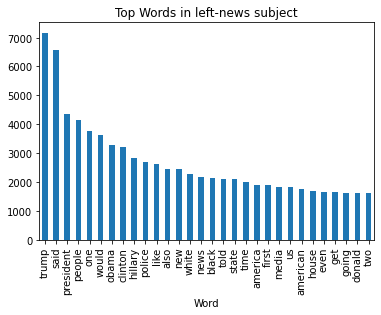

In [36]:
top_k_ngrams_subject('left-news', 1, k=30)

top Words in US_News subject
          Word  count
0           us   2521
1        trump   2180
2        media   1752
3         news   1526
4          one   1247
5         also   1232
6          new   1178
7        would   1173
8      clinton   1108
9         wire   1081
10       syria   1038
11   political   1005
12        said    996
13   president    988
14  government    949
15       state    926
16        like    869
17      people    838
18       story    813
19        even    794
20     century    780
21  washington    774
22      russia    766
23         war    765
24        many    746
25         cia    679
26    election    671
27        time    653
28        yous    648
29         fbi    644


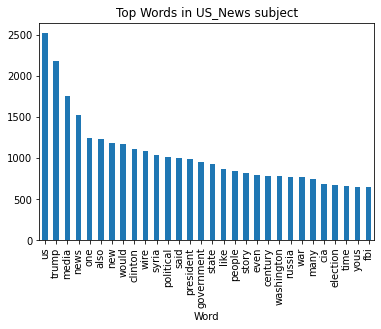

In [37]:
top_k_ngrams_subject('US_News', 1, k=30)

top Words in Middle-east subject
          Word  count
0           us   2502
1        trump   2180
2        media   1704
3         news   1514
4          one   1218
5         also   1211
6          new   1168
7        would   1143
8      clinton   1106
9         wire   1075
10       syria   1038
11   political    990
12        said    986
13   president    972
14  government    911
15       state    905
16        like    852
17      people    821
18       story    799
19        even    784
20     century    776
21  washington    767
22      russia    766
23         war    762
24        many    727
25         cia    678
26    election    669
27        time    641
28        yous    641
29         fbi    640


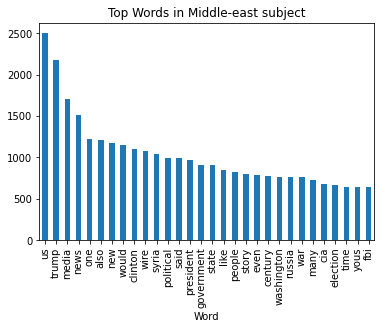

In [38]:
top_k_ngrams_subject('Middle-east', 1, k=30)

###**Step 4: News Length Analysis**

In [39]:
news['title_length'] = news.title.apply(lambda x:len(x.split()))
news['text_length'] = news.text.apply(lambda x:len(x.split()))

#### 4.1 Check news length and filter out empty news

In [40]:
news[news['title_length'] == 0]

,title,text,subject,date,isReal,title_length,text_length
30775,,,politics,https://100percentfedup.com/served-roy-moore-v...,0,0,0
36924,,,politics,https://100percentfedup.com/video-hillary-aske...,0,0,0
36925,,,politics,https://100percentfedup.com/12-yr-old-black-co...,0,0,0
37256,,,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
37257,,,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
38849,,,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
38850,,,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
43286,,,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
43287,,,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0


In [41]:
news[news['title_length'] == 1]

,title,text,subject,date,isReal,title_length,text_length
40350,homepage,vc_rowvc_column width td_block_trending_now li...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,1,37


In [42]:
news[news['text_length'] == 0]

,title,text,subject,date,isReal,title_length,text_length
8970,graphic supreme court roundup,,politicsNews,"June 16, 2016",1,4,0
30775,,,politics,https://100percentfedup.com/served-roy-moore-v...,0,0,0
32340,take poll think president trump pick replace j...,,politics,"May 10, 2017",0,9,0
32458,joe scarborough berates mika brzezinski cheap ...,,politics,"Apr 26, 2017",0,11,0
32607,watch tucker carlson scorch sanctuary city may...,,politics,"Apr 6, 2017",0,10,0
...,...,...,...,...,...,...,...
43244,video hillary clinton religious beliefs must c...,,left-news,"Apr 25, 2015",0,9,0
43274,videoice protecting obama release names crimin...,,left-news,"Apr 14, 2015",0,9,0
43286,,,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0
43287,,,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,0,0


In [43]:
news[news['text_length'] == 1]

,title,text,subject,date,isReal,title_length,text_length
32534,favorite excusesfeaturing hillary rotten clint...,enjoy,politics,"Apr 17, 2017",0,6,1
32668,melania trump gives powerful speech honor inte...,httpswwwyoutubecomwatchvcjzfepsvxzm,politics,"Mar 30, 2017",0,13,1
32850,judge jeanine pirros truth bomb fired us attor...,httpswwwyoutubecomwatchvyrxmfmgoptk,politics,"Mar 12, 2017",0,12,1
32930,newt gingrich punches back democrats mega dose...,httpswwwyoutubecomwatchvpjeoojypnck,politics,"Mar 3, 2017",0,15,1
32934,multimillionaire globalwarming hypocrites leon...,enjoy,politics,"Mar 2, 2017",0,13,1
33102,arrogant illegal alien voted times election ge...,watch,politics,"Feb 11, 2017",0,13,1
33211,football legend jim kelly donald trump took ca...,httpswwwyoutubecomwatchvgqxwfteyas,politics,"Jan 28, 2017",0,13,1
33213,trumps brilliant director communications omaro...,watch,politics,"Jan 28, 2017",0,12,1
33221,president trump calls media ignoring prolife m...,httpswwwyoutubecomwatchvahknzbrqpce,politics,"Jan 26, 2017",0,11,1
33299,heated tucker carlson totally shuts radical li...,httpswwwyoutubecomwatchvrrpscqkajgk,politics,"Jan 17, 2017",0,14,1


In [44]:
news = news[news['title_length'] > 1][news['text_length'] > 1]
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43954 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         43954 non-null  object
 1   text          43954 non-null  object
 2   subject       43954 non-null  object
 3   date          43954 non-null  object
 4   isReal        43954 non-null  int64 
 5   title_length  43954 non-null  int64 
 6   text_length   43954 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


##### After filtering out invalid news, let's again check the label distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


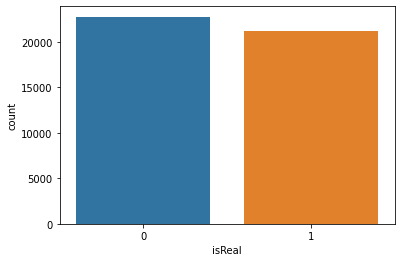

In [45]:
sns.countplot(news['isReal'])

In [46]:
news.isnull().sum()

title           0
text            0
subject         0
date            0
isReal          0
title_length    0
text_length     0
dtype: int64

##### Looks it's still pretty balanced. No need to worry about imbalance issue in this case.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


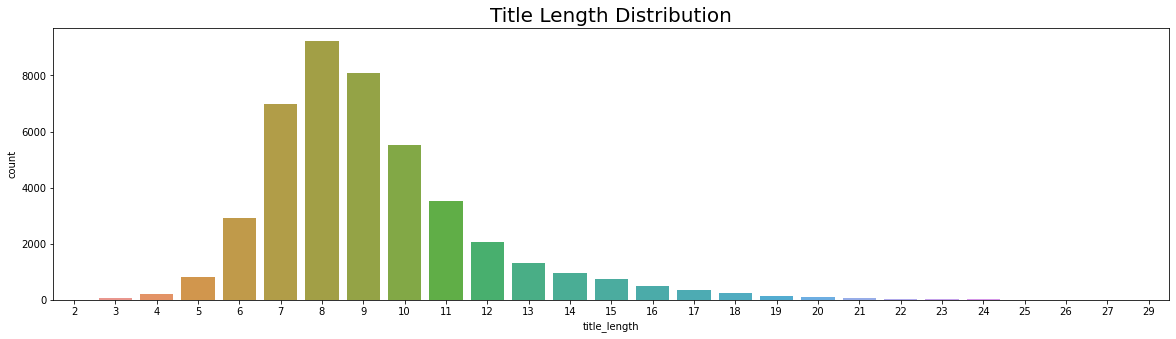

In [47]:
plt.figure(figsize=(20,5))
plt.title("Title Length Distribution", fontsize=20)
sns.countplot(news.title_length)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


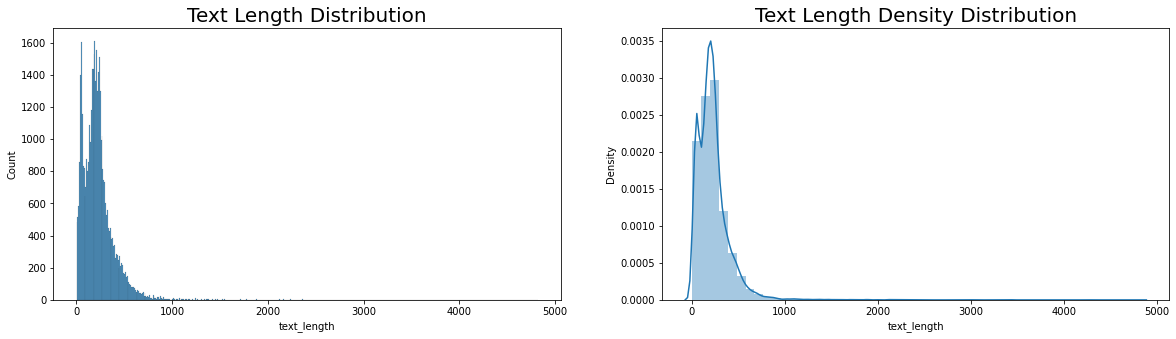

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Text Length Distribution", fontsize=20)
sns.histplot(news.text_length)

plt.subplot(1,2,2)
plt.title("Text Length Density Distribution", fontsize=20)
sns.distplot(news.text_length, hist=True)
# plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


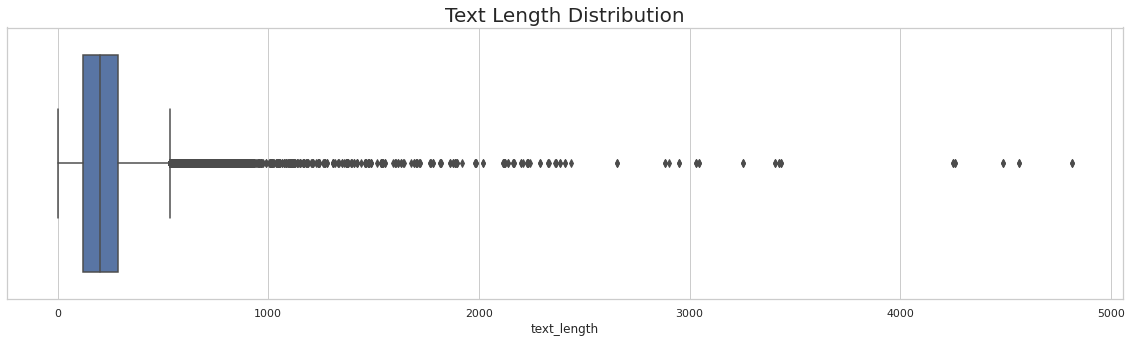

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 5))
plt.title("Text Length Distribution", fontsize=20)
sns.boxplot(news.text_length)
plt.xlim()
plt.show()

In [50]:
quantile = news.text_length.quantile([.25, .5,.75])
for i in range(3):
  print("The {}% percentile of text length is {}".format(25*(i+1), quantile.iloc[i]))

The 25% percentile of text length is 121.0
The 50% percentile of text length is 203.0
The 75% percentile of text length is 286.0


In [51]:
upper_line = quantile.iloc[2] + 1.5 * (quantile.iloc[2] - quantile.iloc[0])
lower_line = quantile.iloc[1] - 1.5 * (quantile.iloc[2] - quantile.iloc[0])
print("lower boundry of boxplot is {}".format(lower_line))
print("upper boundry of boxplot is {}".format(upper_line))

lower boundry of boxplot is -44.5
upper boundry of boxplot is 533.5


### **Step 4: Generating Training and Test Sets**

In [52]:
X = news[['title', 'text', 'subject', 'date']]
y = news['isReal']

In [53]:
any(y.isnull())

False

In [54]:
X.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (35163, 4)
X_test: (8791, 4)
y_train: (35163,)
y_test: (8791,)


In [71]:
any(y_train.isnull())

False

In [72]:
X_train.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [73]:
X_train.to_csv("/content/drive/My Drive/CS410Project/data/X_train.csv", index=False)
X_test.to_csv("/content/drive/My Drive/CS410Project/data/X_test.csv", index=False)
y_train.to_csv("/content/drive/My Drive/CS410Project/data/y_train.csv", index=False)
y_test.to_csv("/content/drive/My Drive/CS410Project/data/y_test.csv", index=False)

In [74]:
full_train = X_train
full_train['label'] = y_train

full_test = X_test
full_test['label'] = y_test

In [77]:
full_train[['label','text']].to_csv("/content/drive/My Drive/CS410Project/data/full_train.csv", index=False)
full_test[['label','text']].to_csv("/content/drive/My Drive/CS410Project/data/full_test.csv", index=False)